In [1]:
#import dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

np.random.uniform()

0.051639457384081044

In [2]:
# generate random set of latitudes and longtitudes in array
# zip obj packs each pair having same index in array into a tuple
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats,lngs))
lat_lngs

[(-20.422972727141854, -16.890180690066614),
 (-25.62662178792479, 72.31115937671345),
 (-84.4801161318675, -133.2659055901718),
 (13.867570538331734, 108.46484271599638),
 (-19.779315839131527, 31.869686535571816),
 (32.67582252239511, -2.086919106361165),
 (-52.694530498084184, 69.0465038679651),
 (-71.84885130429336, -15.20776909985338),
 (72.34856375391035, 154.23494520316774),
 (44.85705712089617, -37.11053365987473),
 (18.998901083308326, 83.74152343530028),
 (84.7765195865851, -118.0519455142759),
 (74.76053743942242, 122.24026147273594),
 (50.57592324724271, 113.5449242580699),
 (-41.34449738106025, 22.04833671251282),
 (-80.25407160186631, -119.7228788129651),
 (29.026864707323853, 126.33399494161637),
 (-40.30176841599568, 81.34613527050294),
 (58.10303113475777, -80.63846974476499),
 (-79.06351166219174, 81.23083706567456),
 (-76.80527250908729, 116.6797845018607),
 (68.43709225722941, 161.20327053694172),
 (-30.463191480881058, -160.98853638953847),
 (-68.08182884542745, -3

In [3]:
#add latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
   

jamestown sh
bambous virieux mu
rikitea pf
play cu vn
chipinge zw
nador ma
saint-philippe re
cape town za
srednekolymsk ru
ribeira grande pt
gunupur in
norman wells ca
tiksi ru
duldurga ru
bredasdorp za
punta arenas cl
nago jp
bambous virieux mu
attawapiskat ca
busselton au
albany au
cherskiy ru
avarua ck
ushuaia ar
dikson ru
luderitz na
yellowknife ca
san cristobal ec
saint-philippe re
bermejo bo
bredasdorp za
kaitangata nz
rockport us
rikitea pf
bethel us
atuona pf
nizhneyansk ru
khatanga ru
pisco pe
cockburn town tc
ushuaia ar
sentyabrskiy ru
east london za
arraial do cabo br
georgetown sh
ushuaia ar
yellowknife ca
ushuaia ar
palabuhanratu id
nikolskoye ru
torbay ca
port alfred za
gerash ir
cauquenes cl
puerto ayora ec
cockburn town bs
talnakh ru
elliot lake ca
cape town za
souillac mu
taoudenni ml
berlevag no
viedma ar
baie-comeau ca
albany au
taolanaro mg
sorland no
bredasdorp za
jamestown sh
kruisfontein za
rikitea pf
nanortalik gl
albany au
bolungarvik is
atuona pf
haines juncti

atuona pf
manasa in
lufilufi ws
hithadhoo mv
saleaula ws
cape town za
benghazi ly
kazalinsk kz
hithadhoo mv
taolanaro mg
lethem gy
mataura pf
saldanha za
busselton au
hermanus za
nikolskoye ru
manta ec
gus-zheleznyy ru
puerto carreno co
jamestown sh
tuktoyaktuk ca
khatanga ru
georgetown sh
salalah om
yellowknife ca
georgetown sh
makakilo city us
bredasdorp za
illoqqortoormiut gl
mandal no
rudbar af
carnarvon au
port alfred za
yellowknife ca
upernavik gl
punta arenas cl
sabang id
hovd mn
ballina au
kavieng pg
rikitea pf
udachnyy ru
port elizabeth za
kavaratti in
sulangan ph
beyneu kz
port alfred za
sitka us
felidhoo mv
dubbo au
santa maria cv
barrow us
hobart au
ushuaia ar
atuona pf
xingcheng cn
bismarck us
hobart au
nanortalik gl
naze jp
provideniya ru
kharod in
sentyabrskiy ru
pisco pe
seguela ci
victoria sc
bartoszyce pl
hilo us
elat il
latung ph
port alfred za
brae gb
bluff nz
new norfolk au
jamestown sh
ozernovskiy ru
ribeira grande pt
ushuaia ar
hermanus za
bredasdorp za
rikitea p

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [7]:
#import requests library
import requests

#import API key
from config import weather_api_key

In [13]:
#starting url for weather map api call with addition of units=imperial for units of measurement
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
#import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
#create output file csv
output_data_file = "weather_data/cities.csv"

#range of latitudes and longtitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [11]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval   ")
print("-----------------------------")

#create counters for first iteration of logging for each recorded responsed and set start at 1
record_count = 1
set_count = 1

#create for Loop through all the cities in list to get index of city for logging purposes and city for creating endpoint URL
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes; if remainder of index dividied by 50 is = 0, if index > or = to 50. if true counts are incremented by 1
    if (i % 50 == 0 and i >= 50):
        set_count =+1
        record_count = 1
        time.sleep(60)
        
    #create endpoint url with each city, remove blank spaces in city name and concatenating the city name wity city.replace
    city_url = url + "&q=" + city.replace(" ","+")
    
    #print statement tells/log the url, record count, and set count numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count before next city is processed
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval   
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | play cu
City not found. Skipping...
Processing Record 5 of Set 1 | chipinge
Processing Record 6 of Set 1 | nador
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | srednekolymsk
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | gunupur
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | duldurga
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | nago
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | cherskiy
Processi

City not found. Skipping...
Processing Record 38 of Set 1 | tecoanapa
Processing Record 39 of Set 1 | laguna
Processing Record 40 of Set 1 | sarramea
Processing Record 41 of Set 1 | ende
Processing Record 42 of Set 1 | atambua
Processing Record 43 of Set 1 | mecca
Processing Record 44 of Set 1 | west bay
Processing Record 45 of Set 1 | concordia
Processing Record 46 of Set 1 | martapura
Processing Record 47 of Set 1 | kvarkeno
Processing Record 48 of Set 1 | avera
Processing Record 49 of Set 1 | carnarvon
Processing Record 50 of Set 1 | aklavik
Processing Record 1 of Set 1 | bulgan
Processing Record 2 of Set 1 | kargasok
Processing Record 3 of Set 1 | malacatepec
Processing Record 4 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 5 of Set 1 | villa alemana
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | bubaque
Processing Record 9 of Set 1 | royal palm beach
Processing Record 10 of Set 1 | altus
Processing 

Processing Record 28 of Set 1 | manta
Processing Record 29 of Set 1 | gus-zheleznyy
Processing Record 30 of Set 1 | puerto carreno
Processing Record 31 of Set 1 | makakilo city
Processing Record 32 of Set 1 | mandal
Processing Record 33 of Set 1 | rudbar
Processing Record 34 of Set 1 | sabang
Processing Record 35 of Set 1 | ballina
Processing Record 36 of Set 1 | udachnyy
Processing Record 37 of Set 1 | kavaratti
Processing Record 38 of Set 1 | sulangan
Processing Record 39 of Set 1 | beyneu
Processing Record 40 of Set 1 | felidhoo
City not found. Skipping...
Processing Record 41 of Set 1 | dubbo
Processing Record 42 of Set 1 | santa maria
Processing Record 43 of Set 1 | xingcheng
Processing Record 44 of Set 1 | bismarck
Processing Record 45 of Set 1 | naze
Processing Record 46 of Set 1 | kharod
Processing Record 47 of Set 1 | seguela
Processing Record 48 of Set 1 | victoria
Processing Record 49 of Set 1 | bartoszyce
Processing Record 50 of Set 1 | elat
Processing Record 1 of Set 1 | l

Processing Record 15 of Set 1 | broome
Processing Record 16 of Set 1 | jambi
Processing Record 17 of Set 1 | juneau
Processing Record 18 of Set 1 | jonava
Processing Record 19 of Set 1 | tual
Processing Record 20 of Set 1 | yeppoon
Processing Record 21 of Set 1 | ahipara
Processing Record 22 of Set 1 | sayyan
Processing Record 23 of Set 1 | cortes
Processing Record 24 of Set 1 | pemba
Processing Record 25 of Set 1 | shanghai
Processing Record 26 of Set 1 | rincon
Processing Record 27 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 28 of Set 1 | abha
Processing Record 29 of Set 1 | puerto cortes
City not found. Skipping...
Processing Record 30 of Set 1 | marsa matruh
Processing Record 31 of Set 1 | puerto baquerizo moreno
Processing Record 32 of Set 1 | lakeside
Processing Record 33 of Set 1 | akdepe
Processing Record 34 of Set 1 | carolina
Processing Record 35 of Set 1 | mizpe ramon
City not found. Skipping...
Processing Record 36 of Set 1 | buarcos
Processing Record

In [12]:
# #create a dictionary for establishing dataframe
# city_data_df = {
#     "City": city.title(),
#     "Lat": city_lat,
#     "Lng": city_lng,
#     "Max Temp": city_max_temp,
#     "Humidity": city_humidity,
#     "Cloudiness": city_clouds,
#     "Wind Speed": city_wind,
#     "Country": city_country,
#     "Date": city_date}
# #convert array of dictionaries to a pd dataframe
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,55.09,78,40,5.99,US,2021-10-31 21:18:55
1,Bambous Virieux,-20.3428,57.7575,71.85,83,40,3.44,MU,2021-10-31 21:23:19
2,Rikitea,-23.1203,-134.9692,73.51,87,71,8.10,PF,2021-10-31 21:23:20
3,Chipinge,-20.1883,32.6236,62.96,76,0,4.94,ZW,2021-10-31 21:23:20
4,Nador,35.1740,-2.9287,70.05,73,0,9.22,MA,2021-10-31 21:23:21
5,Saint-Philippe,-21.3585,55.7679,69.39,86,33,10.00,RE,2021-10-31 21:23:21
6,Cape Town,-33.9258,18.4232,65.08,72,75,11.50,ZA,2021-10-31 21:20:24
7,Srednekolymsk,67.4500,153.6833,-7.69,99,97,6.87,RU,2021-10-31 21:18:30
8,Ribeira Grande,38.5167,-28.7000,68.40,94,75,4.61,PT,2021-10-31 21:23:21
9,Gunupur,19.0833,83.8167,72.99,93,38,1.25,IN,2021-10-31 21:23:22


In [15]:
#display count of weather data values
city_data_df.count()


City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [16]:
#export the city_data into a csv
city_data_df.to_csv('output_data_file.csv') 

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

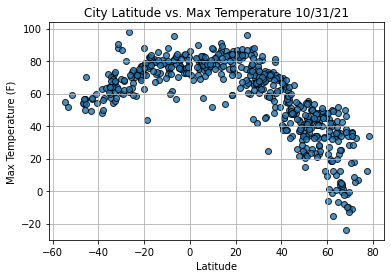

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

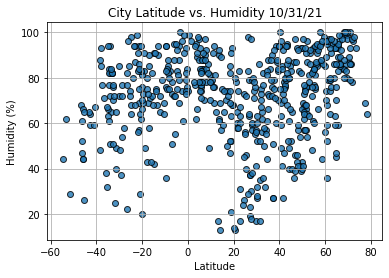

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

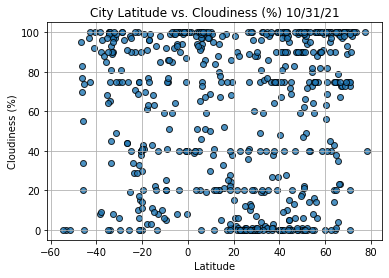

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

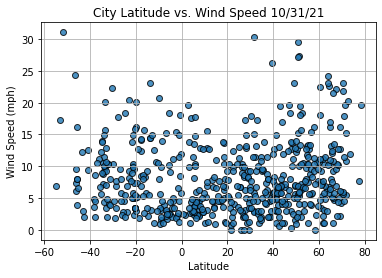

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
#Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

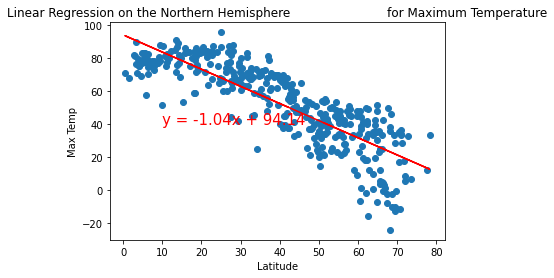

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

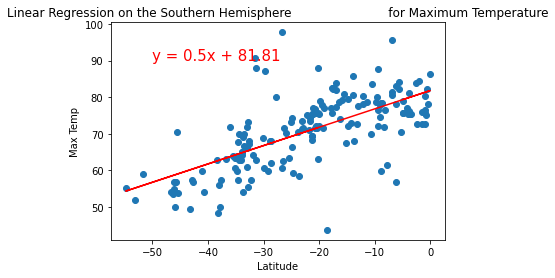

In [28]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

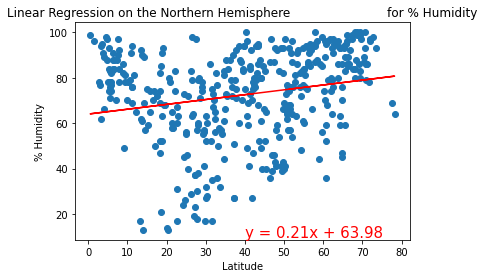

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

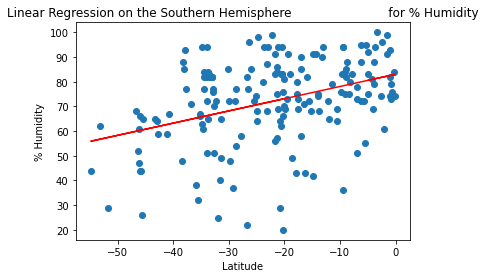

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


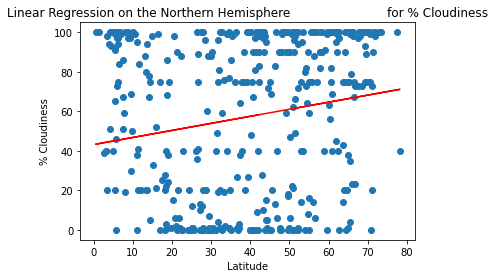

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-18,55))

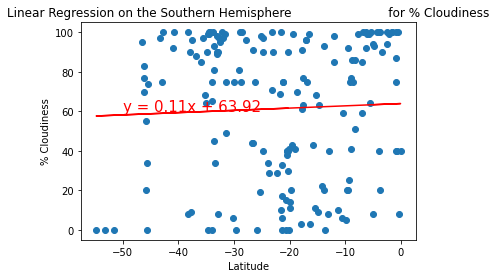

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

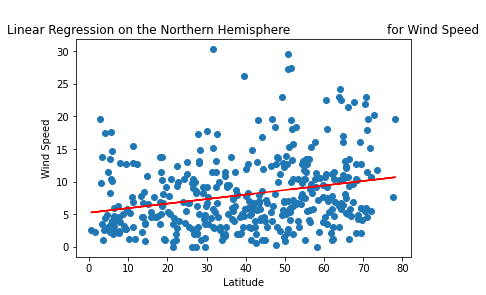

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


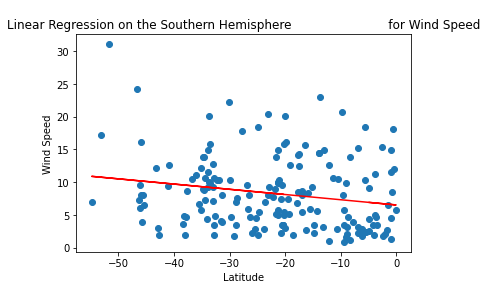

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))